## Outlier detection and removal using z-sxore for normally distributed or nearly normally distributed data

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats     #To draw the QQ plot    


In [115]:
df = pd.read_csv("Data-sets\\placement(1).csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [116]:
df.shape

(1000, 3)

## Outlier detection for cgpa and placement_exam_marks

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


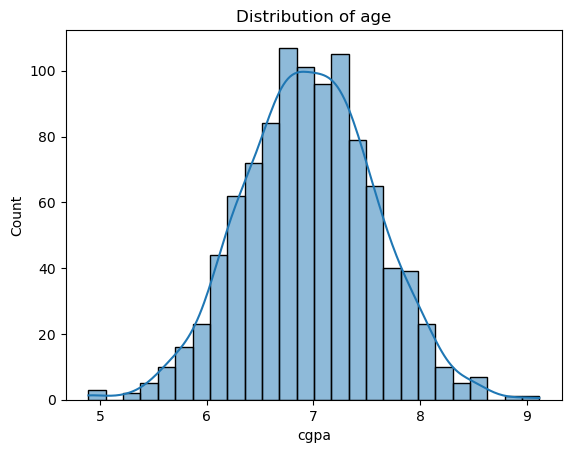

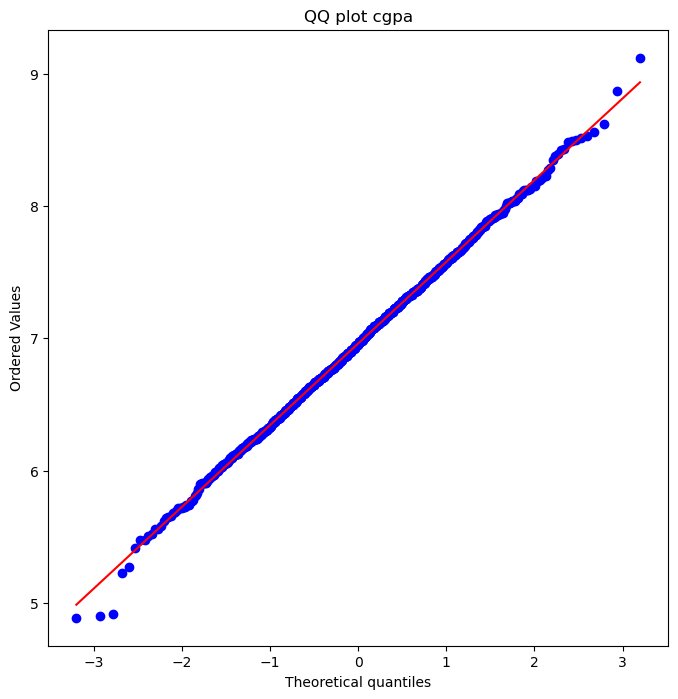

In [117]:
sns.histplot(data=df,x='cgpa',kde=True)
plt.title('Distribution of age')
plt.show()

# To draw the QQ plot for the CGPA columnto identify the distribution 
plt.figure(figsize=(8,8))
stats.probplot(df['cgpa'],dist='norm',plot=plt)
plt.title('QQ plot cgpa')
plt.show()



## Here 'cgpa' is normally distributed hence we can use z-score method to detect and remove the outlier


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


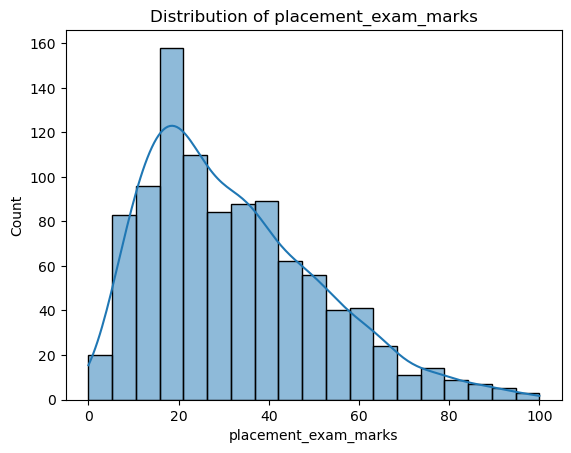

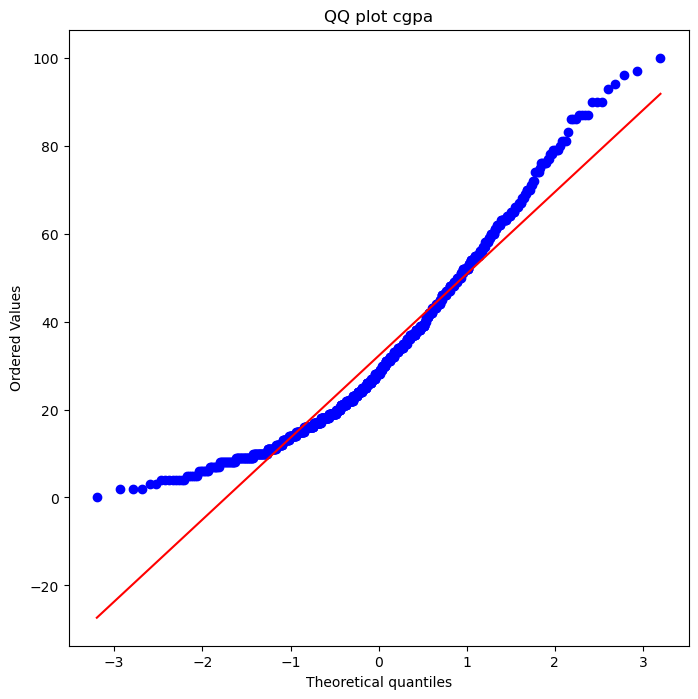

In [118]:
sns.histplot(data=df,x='placement_exam_marks',kde=True)
plt.title('Distribution of placement_exam_marks')
plt.show()

# To draw the QQ plot for the placement_exam_marks columnto identify the distribution 
plt.figure(figsize=(8,8))
stats.probplot(df['placement_exam_marks'],dist='norm',plot=plt)
plt.title('QQ plot cgpa')
plt.show()



## Here 'placement_exam_marks' is skewed so we will use IQR technique to detect and remove the outlier

# Uisng Z-Score method to detect the outlier of 'cgpa'

In [119]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [120]:
df['cgpa'].skew()

-0.014529938929314918

In [121]:
mean_cgpa = df['cgpa'].mean()
std_cgpa = df['cgpa'].std()

print("Min value of cgpa: ",df['cgpa'].min())
print("Max value of cgpa: ",df['cgpa'].max())
print("mean of cgpa:  ",mean_cgpa)
print("standard deviation of cgpa:  ",std_cgpa)


Min value of cgpa:  4.89
Max value of cgpa:  9.12
mean of cgpa:   6.96124
standard deviation of cgpa:   0.6158978751323894


## Finding the boundary value


In [122]:
lower_bound = mean_cgpa - 3 * std_cgpa
upper_bound = mean_cgpa + 3 * std_cgpa
print("lower bound is: ",lower_bound)
print("Upper bound is: ",upper_bound)

lower bound is:  5.113546374602832
Upper bound is:  8.808933625397168


#### Here values above 8.8 and values below 5.11 are outliers

In [123]:
## Finding the rows with outlier
print("Rows with Outlier values are :")
df[(df['cgpa']>upper_bound) | (df['cgpa']<lower_bound)]

#Here 5 rows are outlier
# Total rows in data is 1000 and outlier are 5

Rows with Outlier values are :


,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming the outlier (i.e removing the outliers)

In [124]:
new_df=df[(df['cgpa']>lower_bound) & (df['cgpa']<upper_bound)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [125]:
## Since there were 5 outliers , after trimming the numer of rows remaining are 995

# Capping the outliers (i.e outlier values greater than upper bound is replaced by upper bound and outlier values lower than lower bound are replaced by lower bound)


In [126]:
print("lower bound is: ",lower_bound)
print("Upper bound is: ",upper_bound)

lower bound is:  5.113546374602832
Upper bound is:  8.808933625397168


In [127]:
# np.where(x,y,z)
# where x=condition
# y = statement when condition is true
# z = statement when condition is false

In [128]:
new_df2 = df.copy()
new_df2['cgpa']=np.where(
    df['cgpa'] > upper_bound,   #condition when value is greater than upper bound
    upper_bound,                # then replace it by upper bound
    np.where(                   # if above condition is false then another condition to check if value is smaller than lower bound
        df['cgpa'] < lower_bound,
        lower_bound,            #replace by lower bound
        df['cgpa']              # incase of above both condition are not satisfied(i.e non-outlier) keep the original value
    )
)

new_df2

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


In [137]:
print('Total lower limt cgpa data are: ',(new_df2['cgpa'] == lower_bound).sum())
print('Total upper limt cgpa data are: ',(new_df2['cgpa'] == upper_bound).sum())

Total lower limt cgpa data are:  3
Total upper limt cgpa data are:  2
